## Predictive Modelling - Regression

Using the dataset from MITx Supply Chain Fundamental [this](https://www.edx.org/course/supply-chain-fundamentals?index=product&queryID=24250480a1e2931d7846899ff6341aaf&position=1).

### Data

This dataset contains information about data showing the costs and some other characteristics of about 100 TL shipments

The questions to answer here are :
- **What characteristics are driving the rates for my TL services?**
- **What rates should I expect if new lanes are opened?**

### Independent variable to be forecasted
- **CPL** (int) - cost per load ($)

### Dependednt variable to be used to estimate the independent variable

- **ID** (str) - unique identification number for the load
- **Dist** (str) - distance hauled for shipment (miles)
- **LtTime** (float) - lead time from offer to tender to carrier (days) 0 = sameday
- **TrlLng** (int) - trailer length (feet)
- **Wgt** (int) - weight of goods in trailer (lbs)
- **Eqpt** (str) - equipment type (Dry Van or Refrigerated)


In [97]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read in data

In [98]:
df = pd.read_csv('Data\Transportation Planning - Regression\SC0x_W6L2_DuffyInudstries_RawData.csv')

## EDA & Cleaning: Cleaning the categorical features

In [99]:
# Display of the dataset
df.head()

,ID,CPL,Dist,LdTime,TrlLng,Wgt,Equpt
0,1,3692,1579,1,53,20559,DRY
1,2,3279,1298,12,48,17025,REF
2,3,3120,1382,11,48,26735,DRY
3,4,3205,1033,1,53,26175,DRY
4,5,3188,1320,3,53,17994,DRY


In [100]:
# All the data types of the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        100 non-null    int64 
 1   CPL       100 non-null    int64 
 2   Dist      100 non-null    int64 
 3   LdTime    100 non-null    int64 
 4    TrlLng   100 non-null    int64 
 5   Wgt       100 non-null    int64 
 6   Equpt     100 non-null    object
dtypes: int64(6), object(1)
memory usage: 5.6+ KB


In [101]:
# Descriptive Statistics of the variable
df.drop(['ID'], axis=1).describe(include='all')

,CPL,Dist,LdTime,TrlLng,Wgt,Equpt
count,100.000000,100.00000,100.00000,100.000000,100.000000,100
unique,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,REF
freq,NaN,NaN,NaN,NaN,NaN,60
mean,3131.600000,1207.18000,5.87000,51.250000,26708.180000,NaN
std,655.358519,386.84242,3.96106,2.396862,7069.840196,NaN
min,1660.000000,502.00000,0.00000,48.000000,15100.000000,NaN
25%,2631.750000,904.00000,2.75000,48.000000,21220.750000,NaN
50%,3166.000000,1273.00000,6.00000,53.000000,26513.500000,NaN
75%,3701.250000,1538.25000,9.00000,53.000000,32276.000000,NaN


In [102]:
# Number of entries of Dry and Reefer containers in the dataset
df.groupby(df['Equpt'])['ID'].count()

Equpt
DRY    40
REF    60
Name: ID, dtype: int64

### Ploting correlation between the variables to assess relationships

In [103]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

### One can observe a high correlation between Distance and Cost per load

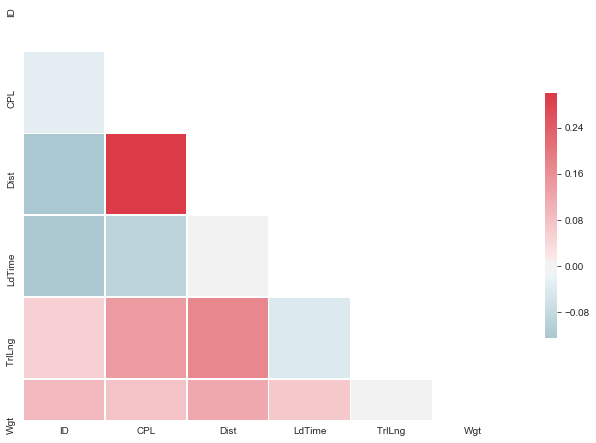

In [104]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

### Observing the plots aginst each variables

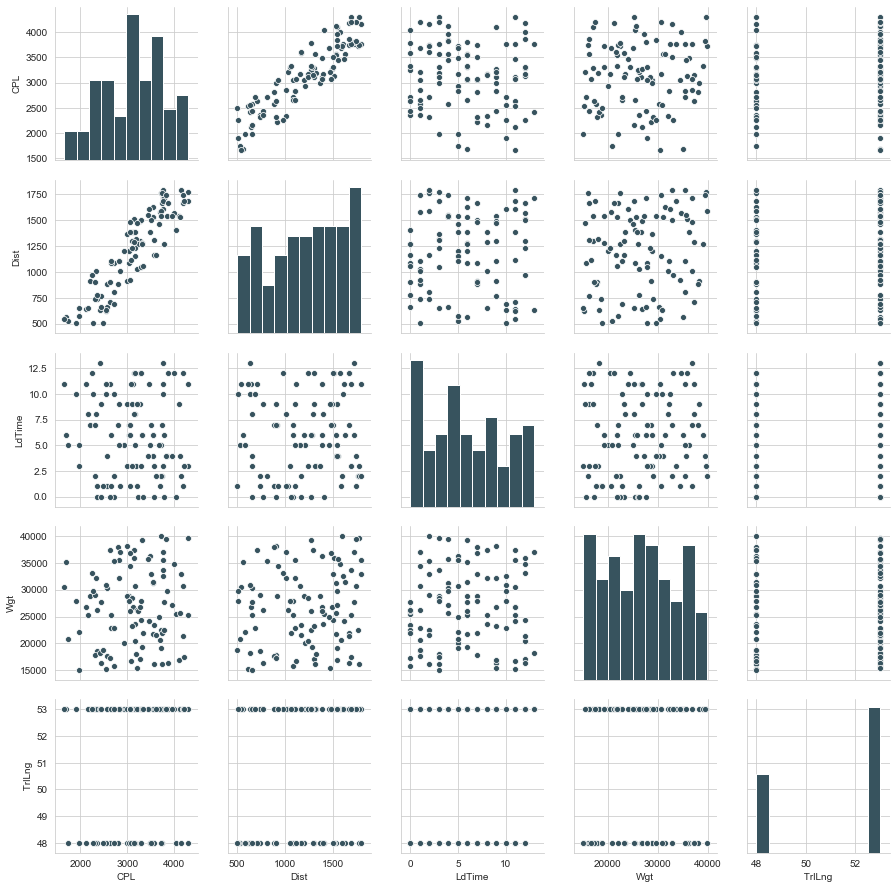

In [105]:
cols = ['CPL', 'Dist', 'LdTime', 'Wgt', ' TrlLng ','Equpt']
sns.pairplot(df[cols]);

### <font color=blue> Observing the plot between Distance and CPL </font>

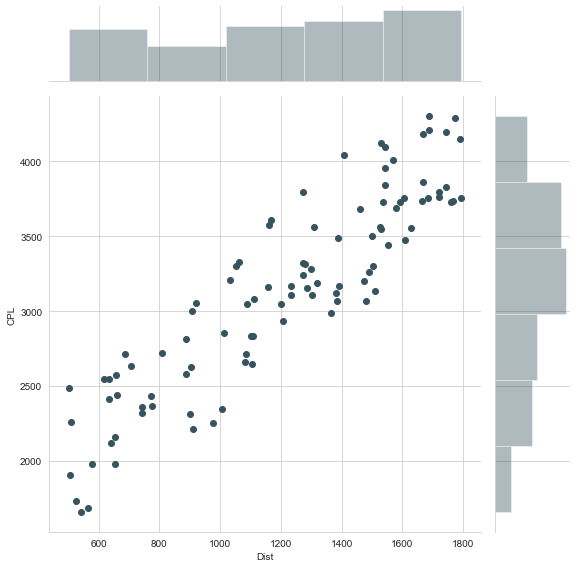

In [106]:
sns.jointplot(x='Dist',y='CPL',data=df, height=8);

### Since equipment type is an important indicator (Dry or Reefer) and may impact the cost we create a numerical indicator for `Equpt`

In [107]:
df['Equpt_ind'] = np.where(df['Equpt']=='DRY', 1, 0)
df.head()

,ID,CPL,Dist,LdTime,TrlLng,Wgt,Equpt,Equpt_ind
0,1,3692,1579,1,53,20559,DRY,1
1,2,3279,1298,12,48,17025,REF,0
2,3,3120,1382,11,48,26735,DRY,1
3,4,3205,1033,1,53,26175,DRY,1
4,5,3188,1320,3,53,17994,DRY,1


### Drop `ID` and `Equpt`

In [108]:
df.drop(['ID', 'Equpt'], axis=1, inplace=True)

## Feature Selection

In [109]:
import statsmodels.api as sm
from scipy import stats

### Since 

In [110]:
X = sm.add_constant(df['Dist'])
est = sm.OLS(df['CPL'], X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    CPL   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     439.3
Date:                Mon, 05 Jul 2021   Prob (F-statistic):           5.47e-38
Time:                        15:12:27   Log-Likelihood:                -704.83
No. Observations:                 100   AIC:                             1414.
Df Residuals:                      98   BIC:                             1419.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1282.3839     92.606     13.848      0.0

### Interpretation
#### Model explains ~82% of total variation in CPL which is very good
#### Both the coef terms make sense in terms of magnitude and signand are statistically valid (p<0.0001)

In [111]:
X = sm.add_constant(df[['Dist','Wgt']])
est = sm.OLS(df['CPL'], X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    CPL   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     218.9
Date:                Mon, 05 Jul 2021   Prob (F-statistic):           1.10e-36
Time:                        15:12:27   Log-Likelihood:                -704.55
No. Observations:                 100   AIC:                             1415.
Df Residuals:                      97   BIC:                             1423.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1354.4908    134.410     10.077      0.0

### Interpretation
#### Model	explains	~82%	of	total	variation	in	CPL
#### Note	that	while	R2 improved	from	Model	1,	the	adj R2 got	worse
#### Both	the	const and	Dist terms	make	sense	in	terms	of	magnitude	and	sign	and	are statistically	valid	(p<0.0001)
#### Wgt does not	make	sense	(more	weight	costs	less?)	and	has	poor	p-value

In [112]:
X = sm.add_constant(df[['Dist','Wgt','Equpt_ind']])
est = sm.OLS(df['CPL'], X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    CPL   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     148.4
Date:                Mon, 05 Jul 2021   Prob (F-statistic):           6.41e-36
Time:                        15:12:27   Log-Likelihood:                -703.45
No. Observations:                 100   AIC:                             1415.
Df Residuals:                      96   BIC:                             1425.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1390.3869    135.864     10.234      0.0

### Interpretation
#### Model	explains	~82%	of	total	variation	in	CPL
#### Both	the	const and	dist terms	are	still	fine
#### Equip does	not	make	sense	in	terms	of	sign	(refrigeration	costs	more)	but	has	a	poor	p-value.		Perhaps	it	is	more	of	a	function	of	distance

### From the exploratory and feature selection we understand that weight of the consignment does not indicate a higher post per load but dist is a surely an indicator. Since in practicality we know that a reefer container should cost more than a dry container we will keep the variable in the model to predict cost per load.

## Training and Testing Data

Now that we've explored the data a bit, let's split the data into training and testing sets.
** Set a variable X (dist, equipment) equal to the numerical features of the shipment data and a variable y equal to the "cost per load" column. **

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
featurecols =  ['Dist','Equpt_ind']
features = df[featurecols]
labels = df['CPL']

In [115]:
# We will split the data into testing(20%) and training (80%)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [116]:
print(len(labels), len(y_train), len(X_test))

100 80 20


## Training the Model on our training data

In [117]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [118]:
lm = LinearRegression()

In [119]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Print out the coefficients of the model**

1.54 - Coefficient of Distance
-54 - Coefficient of equipment type

In [120]:
print('Coefficients of intercept: \n', lm.intercept_)
print('Coefficients of Variables: \n', lm.coef_)

Coefficients of intercept: 
 1294.047919123616
Coefficients of Variables: 
 [  1.54709307 -54.31775624]


## Predicting Test Data
Evaluation its performance by predicting off the test values!

In [121]:
# Predict function is used on the test data to get the predictions
predictions = lm.predict(X_test)

In [122]:
predictions = pd.Series(predictions)
y_test = y_test.reset_index(drop=True)
dt = pd.DataFrame({'Y Test':y_test,'Predicted':predictions})

### A comparison of predicted values and the Actual values

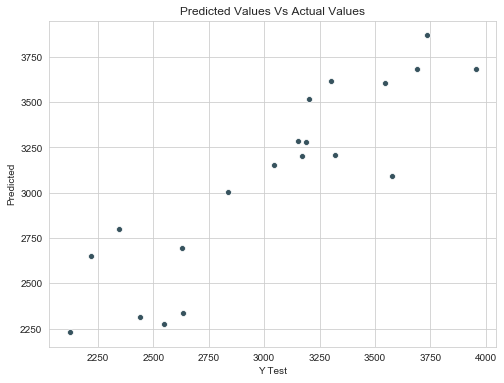

In [123]:
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x='Y Test',y='Predicted', ax=ax,  data=dt).set_title('Predicted Values Vs Actual Values');

## Evaluating the Model

Evaluation of the model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, Root Mean Squared Error and Mean Absolute Percentage Error.**

In [129]:
from sklearn import metrics

print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error : ', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error : ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('Mean Absolute Percentage Error:', np.mean(np.abs((y_test - predictions) / y_test)) * 100, "%")


Mean Absolute Error :  199.17196225967785
Mean Squared Error :  59717.285169642
Root Mean Squared Error :  244.37120364241363
Mean Absolute Percentage Error: 6.982985852529075 %


In [128]:
df['CPL'].describe()

count     100.000000
mean     3131.600000
std       655.358519
min      1660.000000
25%      2631.750000
50%      3166.000000
75%      3701.250000
max      4301.000000
Name: CPL, dtype: float64

## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

In [125]:
mape = (abs(y_test-predictions)/y_test)*100
mape.describe()

count    20.000000
mean      6.982986
std       5.612670
min       0.254872
25%       3.239772
50%       5.143915
75%      10.067660
max      19.491743
dtype: float64

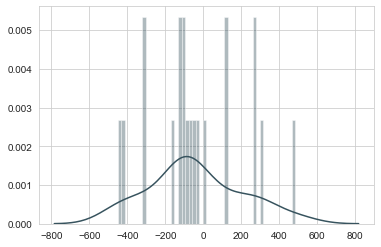

In [126]:
sns.distplot((y_test-predictions),bins=50);

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Distance** is associated with an **increase of 1.549 dollars in cost per load**.

- Holding all other features fixed, a reefer container is associated with an **increase of 54.31 dollars in cost per load**.